[internships.datalabs.info](https://internships.datalabs.info/)

# Internship on "Full Stack Data Science" at InfraBIM Techno Solutions

## DS-09: Project - Crop Recommendation Using Weather And Soil Content

Internship Reg. No.:1031<br>

Name:E.AKSHAY<br>

Date:9-1-23<br>

Other Team Members: (Reg.No. - Name)<br>
   
    1. 1029 -ADDULA JAIDEEP REDDY
    2. 1028 -ARELLY SAIRAM
    
    

# Problem Statement

<li>Machine Learning is well equipped when it comes to analyzing data regarding soil conditions, including moisture level, temperature, and chemical makeup, all of which have an impact upon crop growth and livestock well-being.</li>
<br>
<li>Today in agriculture, this can allow crops to be grown at much higher precision, enabling farmers to treat plants and animals almost individually, which in turn significantly increases the effectiveness of farmers' decisions.</li>
<br>
<li>Using this can develop means to even predict harvest yields and evaluate crop quality for individual plant species to detect crop disease and weed infestations which were previouly impossible!</li>

# Table of Contents

1.[Import Packages](#1.-Importing-the-required-packages-[-Top-])

2.[Load Dataset](#2.-Load-Dataset--[-Top-])

3.[Exploratory Data Analysis (EDA)](#3.-Exploratory-Data-Analysis-(EDA)--[-Top-]-)

4.[Feature Selection](#4.-Feature-Selection--[-Top-]-)

5.[Model Selection and Evaluation](#5.-Model-Selection-and-Evaluation--[-Top-]-)

6.[Create Pickle file](#6.-Create-Pickle-file--[-Top-]-)


In [1]:
# import warnings
import warnings
warnings.filterwarnings('ignore')

# installing some modules
! pip install -q sidetable
(#Table-of-Contents)

# 1. Importing the required packages [[ Top ]](#Table-of-Contents)

In [3]:
# Import Libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

# 2. Load Dataset [ [ Top ]](#Table-of-Contents)

In [4]:
#loading the csv data to a pandas DataFrame
dataset = pd.read_csv('https://internships-data.s3.ap-south-1.amazonaws.com/Projects/Data/crop_recommendation.csv')

In [5]:
#print first 5 rows of the dataset
dataset.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [6]:
#print last 5 rows of the dataset
dataset.tail()

,N,P,K,temperature,humidity,ph,rainfall,label
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee
2199,104,18,30,23.603016,60.396475,6.779833,140.937041,coffee


In [7]:
#number of rows and columns in the dataset
dataset.shape

(2200, 8)

# 3. Exploratory Data Analysis (EDA) [ [ Top ] ](#Table-of-Contents)

In [8]:
#checking for missing values
dataset.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [9]:
#stastistical measures of the data
dataset.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


In [10]:
#checking the distribution of target variable
dataset['label'].value_counts()

rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: label, dtype: int64

array([[<AxesSubplot:title={'center':'N'}>,
        <AxesSubplot:title={'center':'P'}>,
        <AxesSubplot:title={'center':'K'}>],
       [<AxesSubplot:title={'center':'temperature'}>,
        <AxesSubplot:title={'center':'humidity'}>,
        <AxesSubplot:title={'center':'ph'}>],
       [<AxesSubplot:title={'center':'rainfall'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

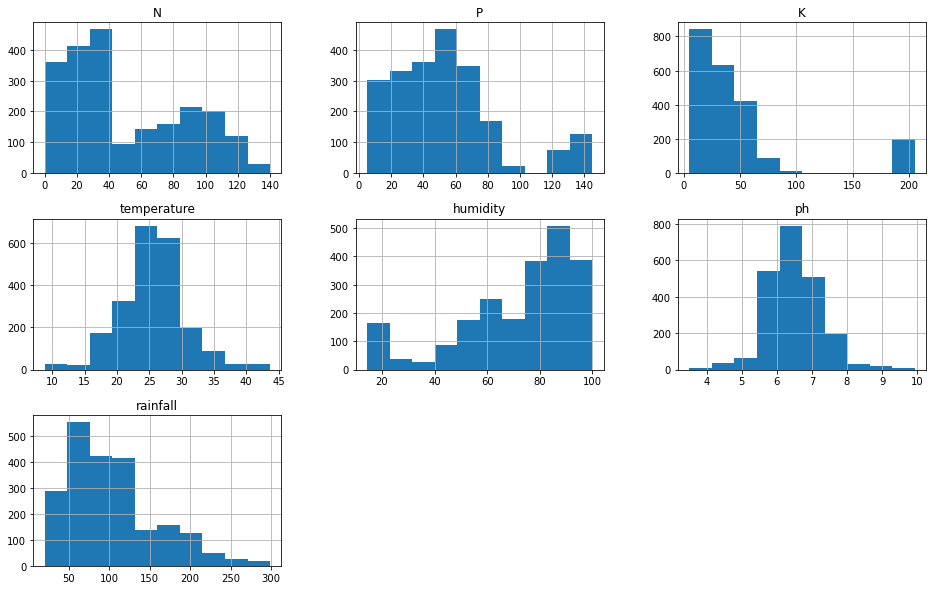

In [11]:
# Generate Histogram - It is a graphical representation of a grouped frequency distribution with continuous classes
dataset.hist(figsize=(16,10),bins=10)

In [12]:
# print the concise summary of the dataset
dataset.info();

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


# 4. Feature Selection [ [ Top ] ](#Table-of-Contents)

In [13]:
X = dataset.drop(['label'], axis=1)
Y = dataset['label']

In [14]:
X.head()

,N,P,K,temperature,humidity,ph,rainfall
0,90,42,43,20.879744,82.002744,6.502985,202.935536
1,85,58,41,21.770462,80.319644,7.038096,226.655537
2,60,55,44,23.004459,82.320763,7.840207,263.964248
3,74,35,40,26.491096,80.158363,6.980401,242.864034
4,78,42,42,20.130175,81.604873,7.628473,262.717340


In [15]:
Y.head()

0    rice
1    rice
2    rice
3    rice
4    rice
Name: label, dtype: object

# Check for imbalanced Classes [ [ Top ]](#Table-of-Contents)

In [16]:
# sidetable - Create Simple Summary Tables in Pandas

import sidetable
dataset.stb.freq(['label'], style=True)

,label,count,percent,cumulative_count,cumulative_percent
0,watermelon,100,4.55%,100,4.55%
1,rice,100,4.55%,200,9.09%
2,pomegranate,100,4.55%,300,13.64%
3,pigeonpeas,100,4.55%,400,18.18%
4,papaya,100,4.55%,500,22.73%
5,orange,100,4.55%,600,27.27%
6,muskmelon,100,4.55%,700,31.82%
7,mungbean,100,4.55%,800,36.36%
8,mothbeans,100,4.55%,900,40.91%
9,mango,100,4.55%,"1,000",45.45%


In [17]:
# Splitting the dataset into 80% training data and 20% testing data.
from sklearn.model_selection import train_test_split 
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=.20)

# A. Feature Selection - Check Missing Count

In [18]:
# Count total missing values in a dataframe
dataset.isnull().sum().sum()

0

There is no missing values observed. So, all featuere are considered



# B. Feature Selection - Dropping constant features

Removing features with low variance
In this step we will be removing the features which have constant features which are actually not important for solving the problem statement

In [19]:
from sklearn.feature_selection import VarianceThreshold
var_thres=VarianceThreshold(threshold=0)
var_thres.fit(X_train)

constant_columns = [column for column in X_train.columns
                    if column not in X_train.columns[var_thres.get_support()]]

print(len(constant_columns))

0


Low Variance is not observed. So, all featuere are considered

In [20]:
corr = dataset.corr(method='pearson',min_periods=1).round(2)
corr.style.background_gradient(cmap='coolwarm')

,N,P,K,temperature,humidity,ph,rainfall
N,1.000000,-0.230000,-0.140000,0.030000,0.190000,0.100000,0.060000
P,-0.230000,1.000000,0.740000,-0.130000,-0.120000,-0.140000,-0.060000
K,-0.140000,0.740000,1.000000,-0.160000,0.190000,-0.170000,-0.050000
temperature,0.030000,-0.130000,-0.160000,1.000000,0.210000,-0.020000,-0.030000
humidity,0.190000,-0.120000,0.190000,0.210000,1.000000,-0.010000,0.090000
ph,0.100000,-0.140000,-0.170000,-0.020000,-0.010000,1.000000,-0.110000
rainfall,0.060000,-0.060000,-0.050000,-0.030000,0.090000,-0.110000,1.000000


As there is no evidence for Strong Correlation is observed, all features are considered for Prediction

# 5. Model Selection and Evaluation [ [ Top ] ](#Table-of-Contents)

## Cross Validation



Cross_val_score is a method which runs cross validation on a dataset to test whether the model can generalise over the whole dataset. The function returns a list of one score per split, and the average of these scores can be calculated to provide a single metric value for the dataset.


In [21]:
#understanding of Machine learning models from sklearn module.
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

classifiers = ['LogisticRegression', 'DecisionTreeClassifier', 
               'KNeighborsClassifier',  'RandomForestClassifier', 
               'LinearDiscriminantAnalysis',  'GaussianNB', 'SVC']

#Model Preparation
num_trees = 200
max_features = 3
models = []
models.append(('LR',LogisticRegression(multi_class='ovr')))
models.append(('DTC',DecisionTreeClassifier()))
models.append(('KNN',KNeighborsClassifier(n_neighbors=10)))
models.append(('RF',RandomForestClassifier(n_estimators=num_trees, max_features=max_features)))
models.append(('LDA',LinearDiscriminantAnalysis()))
models.append(('NB',GaussianNB()))
models.append(('SVM',SVC(probability=True)))

# print (models)

In [22]:
Score = pd.DataFrame({"Classifier":classifiers})

#Fit model
from sklearn.model_selection import KFold
results = []
names = []
scoring = 'accuracy'
model_score = []

for name,model in models:
    kfold = KFold(n_splits=5,shuffle=False)
    cv_results = cross_val_score(model,X_train,Y_train,cv=kfold,scoring=scoring)
    results.append(cv_results)
    names.append(name)
    model_score.append(cv_results.mean()*100)
    
Score["Accuracy"] = model_score
Score.sort_values(by="Accuracy", ascending=False, inplace = True) 
Score

,Classifier,Accuracy
3,RandomForestClassifier,99.375000
5,GaussianNB,99.318182
1,DecisionTreeClassifier,98.295455
6,SVC,97.159091
2,KNeighborsClassifier,96.818182
0,LogisticRegression,96.534091
4,LinearDiscriminantAnalysis,96.477273


In [23]:
model = GaussianNB()
model.fit(X_train, Y_train)


GaussianNB()

In [24]:
y_pred = model.predict(X_test)
print(y_pred)

['apple' 'apple' 'mungbean' 'coffee' 'maize' 'mothbeans' 'chickpea'
 'chickpea' 'rice' 'chickpea' 'papaya' 'blackgram' 'kidneybeans' 'grapes'
 'chickpea' 'coffee' 'kidneybeans' 'papaya' 'grapes' 'watermelon'
 'muskmelon' 'blackgram' 'chickpea' 'grapes' 'watermelon' 'pomegranate'
 'pigeonpeas' 'pigeonpeas' 'chickpea' 'mothbeans' 'pomegranate' 'papaya'
 'coffee' 'mothbeans' 'muskmelon' 'papaya' 'jute' 'lentil' 'blackgram'
 'watermelon' 'orange' 'jute' 'mungbean' 'watermelon' 'mango' 'apple'
 'mothbeans' 'coconut' 'cotton' 'orange' 'coconut' 'banana' 'papaya'
 'orange' 'orange' 'papaya' 'pomegranate' 'jute' 'pigeonpeas' 'pigeonpeas'
 'mungbean' 'grapes' 'banana' 'orange' 'pigeonpeas' 'orange' 'watermelon'
 'mothbeans' 'papaya' 'chickpea' 'orange' 'blackgram' 'lentil' 'apple'
 'chickpea' 'coffee' 'mothbeans' 'coconut' 'banana' 'mothbeans'
 'muskmelon' 'apple' 'grapes' 'chickpea' 'pomegranate' 'muskmelon'
 'kidneybeans' 'orange' 'grapes' 'banana' 'apple' 'pomegranate' 'grapes'
 'coffee' 'gr

In [25]:
result = confusion_matrix(Y_test, y_pred)
print("Confusion Matrix:")
print(result)
result1 = classification_report(Y_test, y_pred)
print("Classification Report:",)
print (result1)
result2 = accuracy_score(Y_test,y_pred)
print("Accuracy:",result2*100)

Confusion Matrix:
[[23  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0 18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0 18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0 24  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0 22  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0 20  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 13  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0 29  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0 12  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0 15  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0 21  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  2  0  0  0  0 21  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0 18  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0 25  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0

In [26]:
dataset.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [27]:
prediction = model.predict([[71,54,16,23,64,6,88]])
print(prediction)

['maize']


# 6. Create Pickle file [ [ Top ] ](#Table-of-Contents) 

In [28]:
import pickle

# save the model
import pickle
pickle.dump(model, open("1031.pkl", "wb"))